In [9]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('SPAM text message 20170820 - Data.csv')

clf = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegressionCV(cv=5 , solver='liblinear', scoring='roc_auc'))

parameters = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'logisticregressioncv__cv': [3, 4, 5],
    'logisticregressioncv__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

clf = GridSearchCV(clf, parameters, cv=4, scoring='roc_auc')


X = df['Message']
Y = pd.get_dummies(df['Category'])['spam']

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf.fit(x_train, y_train)
print(clf.best_params_)
print(f'score: {clf.score(x_test, y_test)}')


{'logisticregressioncv__cv': 5, 'logisticregressioncv__solver': 'newton-cg', 'tfidfvectorizer__ngram_range': (1, 2)}
score: 0.9909331659544466


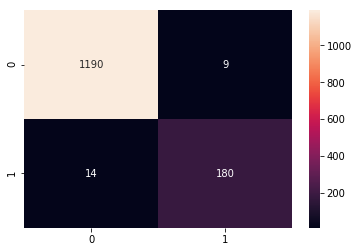

     Category                                            Message  true_result  \
5175      ham  Raji..pls do me a favour. Pls convey my Birthd...            0   
2221      ham  But really quite funny lor wat... Then u shd h...            0   
1118     spam  449050000301 You have won a £2,000 price! To c...            1   
5436      ham                         Mode men or have you left.            0   
1622      ham  Living is very simple.. Loving is also simple....            0   
9        spam  Had your mobile 11 months or more? U R entitle...            1   
4167      ham  Well if I'm that desperate I'll just call arma...            0   
3072      ham     Apart from the one i told you about yesterday?            0   
2739      ham  I sent you the prices and do you mean the  &lt...            0   
4282      ham  Wn u r hurt by d prsn who s close 2 u, do figh...            0   

      model_perdict  
5175              0  
2221              0  
1118              1  
5436              0 

In [10]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

samples = df.loc[y_test.index].copy()
samples['true_result'] = y_test
samples['model_perdict'] = y_pred
print(samples.sample(n=10))
